In [270]:
%automagic on


Automagic is ON, % prefix IS NOT needed for line magics.


In [271]:
folder = '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'
!ls -ltr {folder}

total 48780
-rw-rw-r-- 1 dsc dsc     1695 oct 19 16:58 00_work_line_notes.txt
-rw-rw-r-- 1 dsc dsc   309961 oct 20 11:55 01_ciclo_prueba_muestra.ipynb
-rw-rw-r-- 1 dsc dsc   337332 oct 23 16:39 02_ciclo_prueba_muestra_ordenado.ipynb
drwxrwxr-x 2 dsc dsc     4096 oct 23 16:56 csv_files
-rw-rw-r-- 1 dsc dsc    26352 oct 29 18:05 residuo.png
-rw-rw-r-- 1 dsc dsc    28090 oct 29 18:05 estacionalidad.png
-rw-rw-r-- 1 dsc dsc    16061 oct 29 18:05 tendencia.png
-rw-rw-r-- 1 dsc dsc    36481 oct 29 18:06 todo.png
-rw-rw-r-- 1 dsc dsc    28121 oct 29 18:37 residuo_nube.png
-rw-rw-r-- 1 dsc dsc    16512 oct 29 18:38 estacionalidad_nube.png
-rw-rw-r-- 1 dsc dsc    28910 oct 29 18:38 tendencia_nube.png
-rw-rw-r-- 1 dsc dsc    48129 oct 29 18:38 todo_nube.png
-rw-rw-r-- 1 dsc dsc  2403149 nov  3 18:08 04_ciclo_prueba_muestra_serie_temporal_lio.ipynb
-rw-rw-r-- 1 dsc dsc  1919420 nov  9 12:25 04_ciclo_prueba_muestra_serie_temporal.ipynb
-rw-rw-r-- 1 dsc dsc  1741628 nov 16 17:12 serie_completa.csv


In [272]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [273]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [274]:
!ls -ltr datos_accs_madrid.csv

-rw-rw-r-- 1 dsc dsc 24017454 nov 16 18:37 datos_accs_madrid.csv


In [275]:
import pandas as pd
df_accs = pd.read_csv("datos_accs_madrid.csv")

In [276]:
# Cargara librerias y paquetes

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [277]:
# Análisis Exploratorio Inicial
# Ahora veamos cuantas columnas y registros tenemos:
df_accs.shape

(252998, 11)

In [278]:
df_accs.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [279]:
df_accs.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [280]:
# Borramos variables innecesarias
#drop_elements = ['FECHA', 'NUM_PERSONAS', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'LESIVIDAD']
drop_elements = ['FECHA']
df_accs = df_accs.drop(drop_elements, axis = 1)

In [281]:
# algunas visualizaciones para comprender mejor los datos.
# Mirar balanceo de etiquetas

In [282]:
# Comprobar valores nulos
df_accs.isnull().sum()

HORA              0
DIA_SEMANA        0
DISTRITO          0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
EDAD_APROX        0
dtype: int64

In [283]:
df_accs.groupby('HORA').size()

HORA
00:00     4729
01:00     3602
02:00     2776
03:00     2431
04:00     2131
05:00     2225
06:00     3992
07:00     6428
08:00    11759
09:00    14348
10:00    11561
11:00    12492
12:00    14473
13:00    15921
14:00    18232
15:00    14557
16:00    13590
17:00    14137
18:00    16259
19:00    18049
20:00    17244
21:00    14113
22:00    10758
23:00     7191
dtype: int64

In [284]:
df_accs.groupby('DIA_SEMANA').size()

DIA_SEMANA
DOMINGO      27249
JUEVES       38794
LUNES        36301
MARTES       37707
MIERCOLES    38697
SABADO       30798
VIERNES      43452
dtype: int64

In [285]:
df_accs.groupby('DISTRITO').size()

DISTRITO
ARGANZUELA             13050
BARAJAS                 3402
CARABANCHEL            15593
CENTRO                 17717
CHAMARTIN              18857
CHAMBERI               14466
CIUDAD LINEAL          16580
FUENCARRAL-EL PARDO    13750
HORTALEZA               8546
LATINA                 12218
MONCLOA-ARAVACA        13587
MORATALAZ               6246
PUENTE DE VALLECAS     16180
RETIRO                 13665
SALAMANCA              19269
SAN BLAS               11987
TETUAN                 13626
USERA                   8808
VICALVARO               3142
VILLA DE VALLECAS       5601
VILLAVERDE              6708
dtype: int64

In [286]:
df_accs.groupby('NUM_PERSONAS').size()

NUM_PERSONAS
1     183618
2      43631
3      14168
4       6165
5       2712
6       1116
7        755
8        270
9        139
10       120
11        56
12        28
13        46
14        33
15        17
16        19
18        41
19        42
22        22
dtype: int64

In [287]:
df_accs.groupby('TIPO_ACCIDENTE').size()

TIPO_ACCIDENTE
ATROPELLO                     41398
CAIDA_BICICLETA                2616
CAIDA_CICLOMOTOR               2536
CAIDA_MOTOCICLETA             14155
CAIDA_VEHICULO_ 3_ RUEDAS        19
CAIDA_VIAJERO_ BUS             2794
CHOQUE_CON_OBJETO_FIJO        12595
COLISION_DOBLE               145544
COLISION_MULTIPLE             29195
OTRAS_CAUSAS                   1011
VUELCO                         1135
dtype: int64

In [288]:
df_accs.groupby('TIPO_VEHICULO').size()

TIPO_VEHICULO
AMBULANCIA            492
AUTOBUS_AUTOCAR      7017
AUTO_TAXI            8311
BICICLETA            5524
CAMION               2499
CICLOMOTOR           6045
FURGONETA            9873
MOTOCICLETA         32742
NO_ASIGNADO         46852
TURISMO            131483
VARIOS               2117
VEH.3 RUEDAS           43
dtype: int64

In [289]:
df_accs.groupby('TIPO_PERSONA').size()

TIPO_PERSONA
CONDUCTOR    158734
PEATON        15118
TESTIGO       31666
VIAJERO       47480
dtype: int64

In [290]:
df_accs.groupby('SEXO').size()

SEXO
HOMBRE         160165
MUJER           80717
NO_ASIGNADO     12116
dtype: int64

In [291]:
df_accs.groupby('LESIVIDAD').size()

LESIVIDAD
HERIDO_GRAVE      8850
HERIDO_LEVE     102716
INGRESO_LEVE    130053
MUERTO             275
NO_ASIGNADO      11104
dtype: int64

In [292]:
df_accs.groupby('EDAD_APROX').size()

EDAD_APROX
0               3128
10              5124
15              2593
20              9304
25             49329
30             31110
35             30169
40             26421
45             22167
50             17999
55             12454
65             13459
70              3656
75              6361
NO_ASIGNADO    19724
dtype: int64

In [293]:
# Veamos cuántos registros hay según DIA_SEMANA, como variable central:

In [294]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

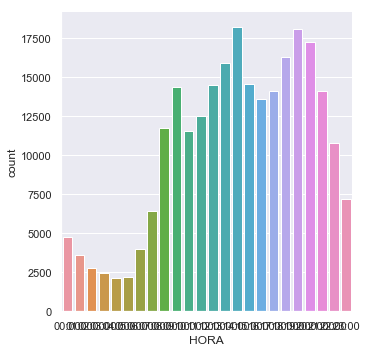

In [295]:
sb.catplot('HORA',data=df_accs,kind="count", \
           order=['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', \
                  '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', \
                  '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', \
                  '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
          )

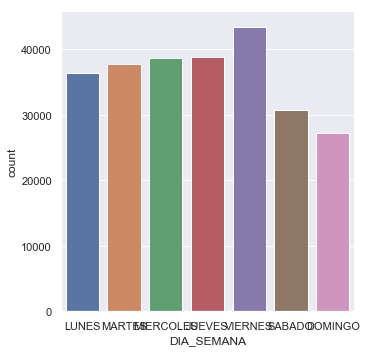

In [296]:
sb.catplot('DIA_SEMANA',data=df_accs,kind="count", \
           order=['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']
          )

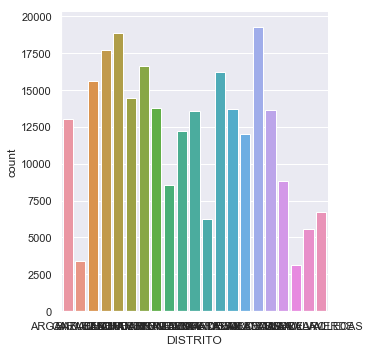

In [297]:
sb.catplot('DISTRITO',data=df_accs,kind="count", \
           order = ['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN', \
                    'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA', \
                    'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS', \
                    'RETIRO', 'SAN BLAS', 'SALAMANCA', 'TETUAN', 'USERA', 'VICALVARO', \
                    'VILLA DE VALLECAS', 'VILLAVERDE']
          )

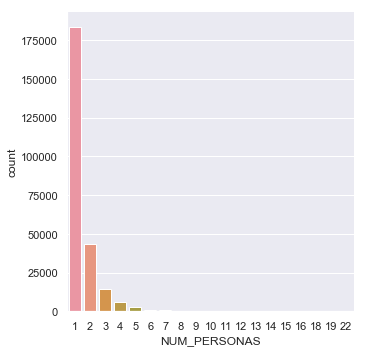

In [298]:
sb.catplot('NUM_PERSONAS',data=df_accs,kind="count"
          )

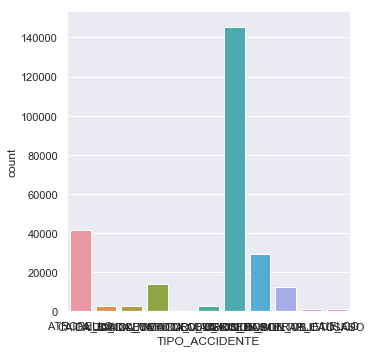

In [299]:
sb.catplot('TIPO_ACCIDENTE',data=df_accs,kind="count", \
           order = ['ATROPELLO', 'CAIDA_BICICLETA', 'CAIDA_CICLOMOTOR', 'CAIDA_MOTOCICLETA', \
                    'CAIDA_VEHICULO_ 3_ RUEDAS', 'CAIDA_VIAJERO_ BUS', 'COLISION_DOBLE', \
                    'COLISION_MULTIPLE', 'CHOQUE_CON_OBJETO_FIJO', 'OTRAS_CAUSAS', 'VUELCO']
          )

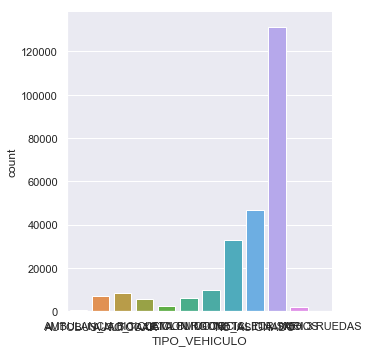

In [300]:
sb.catplot('TIPO_VEHICULO',data=df_accs,kind="count", \
           order = ['AMBULANCIA', 'AUTOBUS_AUTOCAR', 'AUTO_TAXI', 'BICICLETA', 'CAMION', \
                    'CICLOMOTOR', 'FURGONETA', 'MOTOCICLETA', 'NO_ASIGNADO', 'TURISMO', \
                    'VARIOS', 'VEH.3 RUEDAS']
          )

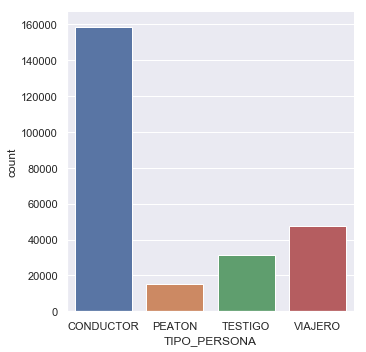

In [301]:
sb.catplot('TIPO_PERSONA',data=df_accs,kind="count", \
           order = ['CONDUCTOR', 'PEATON', 'TESTIGO', 'VIAJERO']
          )

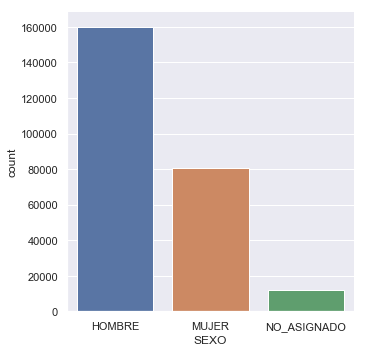

In [302]:
sb.catplot('SEXO',data=df_accs,kind="count", \
           order = ['HOMBRE', 'MUJER', 'NO_ASIGNADO']
          )

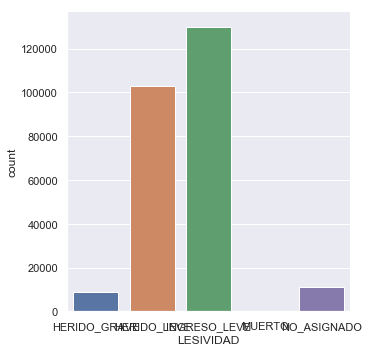

In [303]:
sb.catplot('LESIVIDAD',data=df_accs,kind="count", \
           order = ['HERIDO_GRAVE', 'HERIDO_LEVE', 'INGRESO_LEVE', 'MUERTO', 'NO_ASIGNADO']
          )

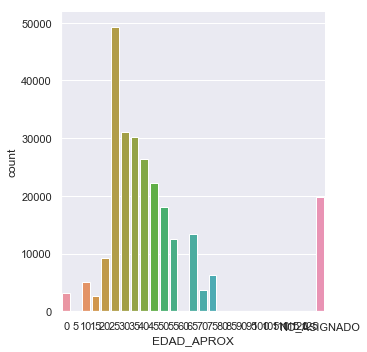

In [304]:
sb.catplot('EDAD_APROX',data=df_accs,kind="count", \
           order = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', \
                    '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', \
                    '105', '110', '115', '120', '125', 'NO_ASIGNADO']
          )

In [305]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

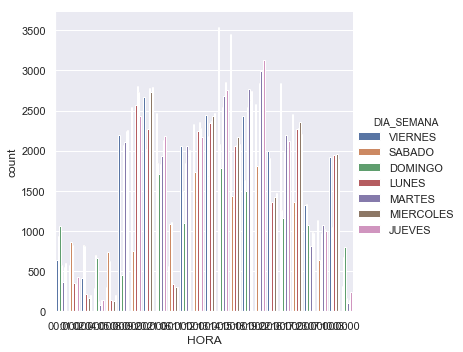

In [306]:
sb.catplot('HORA',data=df_accs,hue='DIA_SEMANA',kind="count")

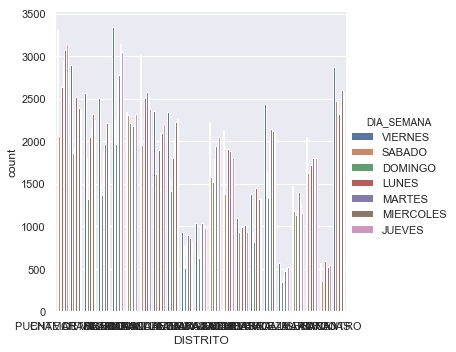

In [307]:
sb.catplot('DISTRITO',data=df_accs,hue='DIA_SEMANA',kind="count")

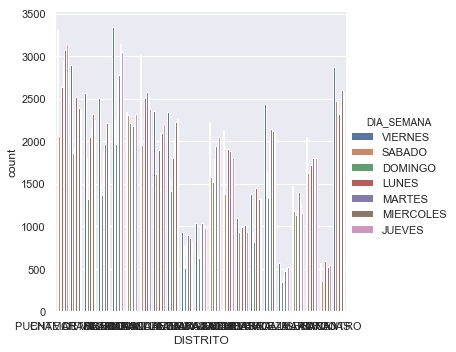

In [308]:
sb.catplot('DISTRITO',data=df_accs,hue='DIA_SEMANA',kind="count")

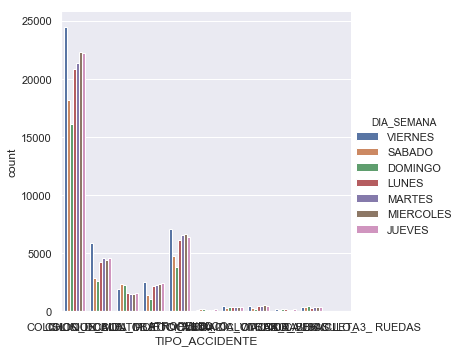

In [309]:
sb.catplot('TIPO_ACCIDENTE',data=df_accs,hue='DIA_SEMANA',kind="count")

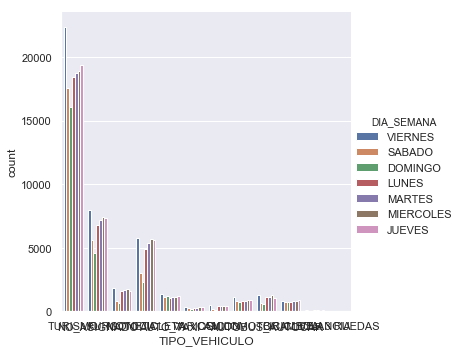

In [310]:
sb.catplot('TIPO_VEHICULO',data=df_accs,hue='DIA_SEMANA',kind="count")

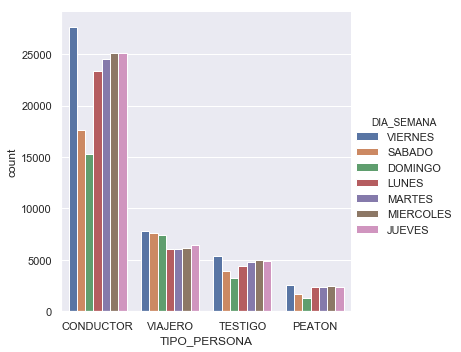

In [311]:
sb.catplot('TIPO_PERSONA',data=df_accs,hue='DIA_SEMANA',kind="count")

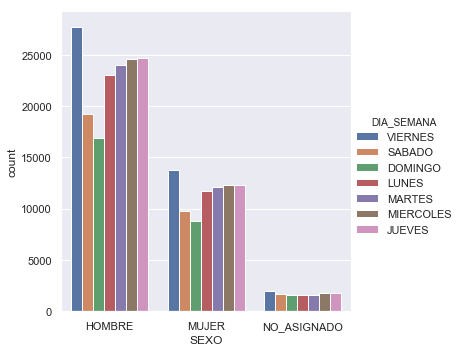

In [312]:
sb.catplot('SEXO',data=df_accs,hue='DIA_SEMANA',kind="count")

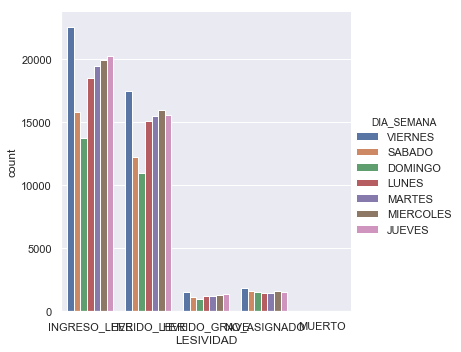

In [313]:
sb.catplot('LESIVIDAD',data=df_accs,hue='DIA_SEMANA',kind="count")

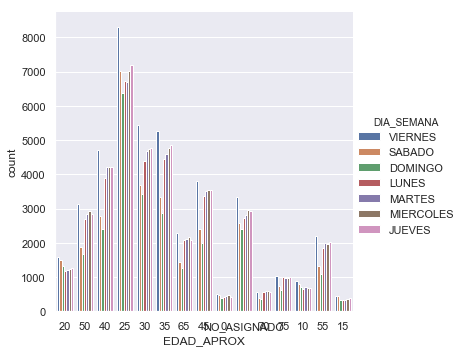

In [314]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DIA_SEMANA',kind="count")

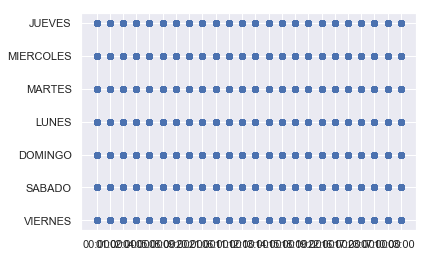

In [315]:
plt.scatter(df_accs['HORA'].values, df_accs['DIA_SEMANA'].values)
plt.show()

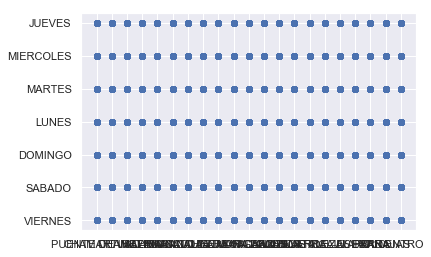

In [316]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['DIA_SEMANA'].values)
plt.show()

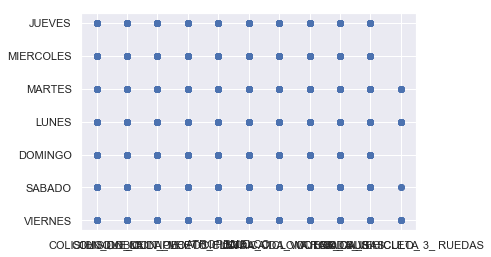

In [317]:
plt.scatter(df_accs['TIPO_ACCIDENTE'].values, df_accs['DIA_SEMANA'].values)
plt.show()

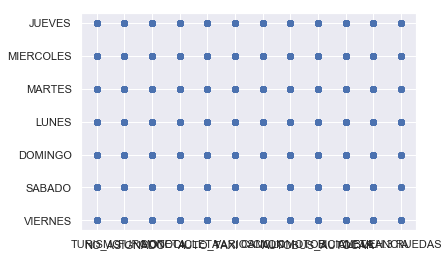

In [318]:
plt.scatter(df_accs['TIPO_VEHICULO'].values, df_accs['DIA_SEMANA'].values)
plt.show()

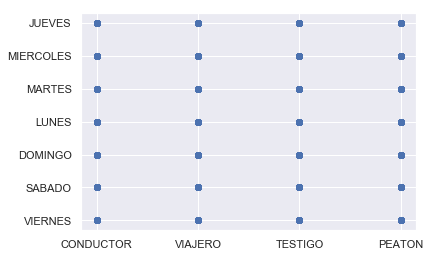

In [319]:
plt.scatter(df_accs['TIPO_PERSONA'].values, df_accs['DIA_SEMANA'].values)
plt.show()

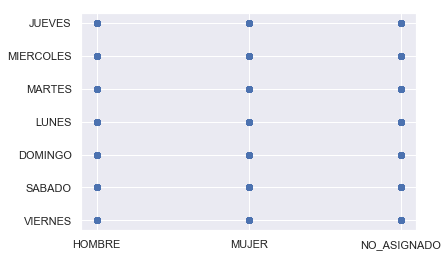

In [320]:
plt.scatter(df_accs['SEXO'].values, df_accs['DIA_SEMANA'].values)
plt.show()

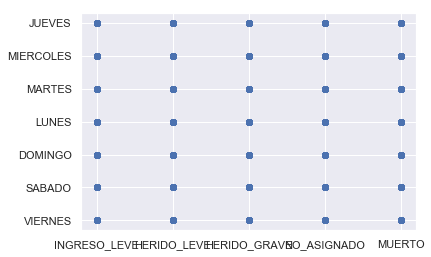

In [321]:
plt.scatter(df_accs['LESIVIDAD'].values, df_accs['DIA_SEMANA'].values)
plt.show()

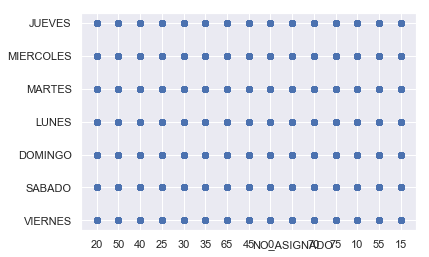

In [322]:
plt.scatter(df_accs['EDAD_APROX'].values, df_accs['DIA_SEMANA'].values)
plt.show()

In [323]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [324]:
# Mapeo de datos

In [325]:
#Filtro: Columnas que empiezan por xxx
#filtro_borrar = [col for col in df_accs if col.startswith('NUM_PERS')]
# borrar columnas sobrantes:
#df_accs = df_accs.drop(columns=filtro_borrar)

In [326]:
# Y también podemos ver la interrelación mediante el gráfico de pares (matriz de diagrama de dispersión)
# Nos permite ver tanto la distribución de variables individuales como las relaciones entre dos variables.
# Etiquetamos mediante Label Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [327]:
del df_accs_sample
del df_accs_LE_sample

In [328]:
df_accs_sample = df_accs.sample(n=10000).reset_index(drop=True)

In [329]:
df_accs_LE_sample = df_accs.sample(n=50000).reset_index(drop=True)

In [330]:
df_accs_LE_sample['HORA']= lab.fit_transform(df_accs_LE_sample['HORA'])
df_accs_LE_sample['DIA_SEMANA']= lab.fit_transform(df_accs_LE_sample['DIA_SEMANA'])
df_accs_LE_sample['DISTRITO']= lab.fit_transform(df_accs_LE_sample['DISTRITO'])
df_accs_LE_sample['TIPO_ACCIDENTE']= lab.fit_transform(df_accs_LE_sample['TIPO_ACCIDENTE'])
df_accs_LE_sample['TIPO_VEHICULO']= lab.fit_transform(df_accs_LE_sample['TIPO_VEHICULO'])
df_accs_LE_sample['TIPO_PERSONA']= lab.fit_transform(df_accs_LE_sample['TIPO_PERSONA'])
df_accs_LE_sample['SEXO']= lab.fit_transform(df_accs_LE_sample['SEXO'])
df_accs_LE_sample['LESIVIDAD']= lab.fit_transform(df_accs_LE_sample['LESIVIDAD'])
## Para escalabilizar los datos de la EDAD_APROX y poder incluirlos, los transformamos.
df_accs_LE_sample['EDAD_APROX']= lab.fit_transform(df_accs_LE_sample['EDAD_APROX'])

sb.pairplot(df_accs_LE_sample.dropna(), hue='DIA_SEMANA', height=3, \
            vars=['HORA','DISTRITO','TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', \
                  'SEXO','LESIVIDAD','EDAD_APROX'], kind='reg', aspect=3)

In [331]:
df_accs_lab_ohe = df_accs.reset_index(drop=True).copy()

In [332]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [333]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [334]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [335]:
df_accs_lab_ohe.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [336]:
df_accs.dtypes

HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [337]:
df_accs_lab_ohe.dtypes

HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [338]:
df_accs_lab_ohe.head(3)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [339]:
df_accs_lab_ohe['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [340]:
# Comprobar valores nulos
df_accs_lab_ohe.isnull().sum()

HORA              0
DIA_SEMANA        0
DISTRITO          0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
EDAD_APROX        0
dtype: int64

In [341]:
df_accs_lab_ohe_sample = df_accs_lab_ohe.sample(n=10000).reset_index(drop=True)

In [342]:
df_accs_lab_ohe_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [343]:
df_accs_lab_ohe_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,08:00,LUNES,SAN BLAS,1,COLISION_DOBLE,MOTOCICLETA,CONDUCTOR,HOMBRE,HERIDO_LEVE,40


In [344]:
df_accs_lab_ohe_sample.dtypes

HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [347]:
df_accs_dumm_sample = pd.get_dummies(df_accs_lab_ohe_sample, drop_first=True)

In [348]:
df_accs_dumm_sample.shape

(10000, 94)

In [349]:
df_accs_dumm_sample.head(1)

,NUM_PERSONAS,HORA_01:00,HORA_02:00,HORA_03:00,HORA_04:00,HORA_05:00,HORA_06:00,HORA_07:00,HORA_08:00,HORA_09:00,...,EDAD_APROX_30,EDAD_APROX_35,EDAD_APROX_40,EDAD_APROX_45,EDAD_APROX_50,EDAD_APROX_55,EDAD_APROX_65,EDAD_APROX_70,EDAD_APROX_75,EDAD_APROX_NO_ASIGNADO
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [350]:
# Comprobar valores nulos
df_accs_lab_ohe_sample.isnull().sum()

HORA              0
DIA_SEMANA        0
DISTRITO          0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
EDAD_APROX        0
dtype: int64

In [351]:
# Comprobar valores nulos
df_accs_dumm_sample.isnull().sum()

NUM_PERSONAS              0
HORA_01:00                0
HORA_02:00                0
HORA_03:00                0
HORA_04:00                0
                         ..
EDAD_APROX_55             0
EDAD_APROX_65             0
EDAD_APROX_70             0
EDAD_APROX_75             0
EDAD_APROX_NO_ASIGNADO    0
Length: 94, dtype: int64

In [352]:
# No limitar display de columnas
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(df_accs_dumm_sample.head(1))

,NUM_PERSONAS,HORA_01:00,HORA_02:00,HORA_03:00,HORA_04:00,HORA_05:00,HORA_06:00,HORA_07:00,HORA_08:00,HORA_09:00,HORA_10:00,HORA_11:00,HORA_12:00,HORA_13:00,HORA_14:00,HORA_15:00,HORA_16:00,HORA_17:00,HORA_18:00,HORA_19:00,HORA_20:00,HORA_21:00,HORA_22:00,HORA_23:00,DIA_SEMANA_JUEVES,DIA_SEMANA_LUNES,DIA_SEMANA_MARTES,DIA_SEMANA_MIERCOLES,DIA_SEMANA_SABADO,DIA_SEMANA_VIERNES,DISTRITO_BARAJAS,DISTRITO_CARABANCHEL,DISTRITO_CENTRO,DISTRITO_CHAMARTIN,DISTRITO_CHAMBERI,DISTRITO_CIUDAD LINEAL,DISTRITO_FUENCARRAL-EL PARDO,DISTRITO_HORTALEZA,DISTRITO_LATINA,DISTRITO_MONCLOA-ARAVACA,DISTRITO_MORATALAZ,DISTRITO_PUENTE DE VALLECAS,DISTRITO_RETIRO,DISTRITO_SALAMANCA,DISTRITO_SAN BLAS,DISTRITO_TETUAN,DISTRITO_USERA,DISTRITO_VICALVARO,DISTRITO_VILLA DE VALLECAS,DISTRITO_VILLAVERDE,TIPO_ACCIDENTE_CAIDA_BICICLETA,TIPO_ACCIDENTE_CAIDA_CICLOMOTOR,TIPO_ACCIDENTE_CAIDA_MOTOCICLETA,TIPO_ACCIDENTE_CAIDA_VEHICULO_ 3_ RUEDAS,TIPO_ACCIDENTE_CAIDA_VIAJERO_ BUS,TIPO_ACCIDENTE_CHOQUE_CON_OBJETO_FIJO,TIPO_ACCIDENTE_COLISION_DOBLE,TIPO_ACCIDENTE_COLISION_MULTIPLE,TIPO_ACCIDENTE_OTRAS_CAUSAS,TIPO_ACCIDENTE_VUELCO,TIPO_VEHICULO_AUTOBUS_AUTOCAR,TIPO_VEHICULO_AUTO_TAXI,TIPO_VEHICULO_BICICLETA,TIPO_VEHICULO_CAMION,TIPO_VEHICULO_CICLOMOTOR,TIPO_VEHICULO_FURGONETA,TIPO_VEHICULO_MOTOCICLETA,TIPO_VEHICULO_NO_ASIGNADO,TIPO_VEHICULO_TURISMO,TIPO_VEHICULO_VARIOS,TIPO_VEHICULO_VEH.3 RUEDAS,TIPO_PERSONA_PEATON,TIPO_PERSONA_TESTIGO,TIPO_PERSONA_VIAJERO,SEXO_MUJER,SEXO_NO_ASIGNADO,LESIVIDAD_HERIDO_LEVE,LESIVIDAD_INGRESO_LEVE,LESIVIDAD_MUERTO,LESIVIDAD_NO_ASIGNADO,EDAD_APROX_10,EDAD_APROX_15,EDAD_APROX_20,EDAD_APROX_25,EDAD_APROX_30,EDAD_APROX_35,EDAD_APROX_40,EDAD_APROX_45,EDAD_APROX_50,EDAD_APROX_55,EDAD_APROX_65,EDAD_APROX_70,EDAD_APROX_75,EDAD_APROX_NO_ASIGNADO
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [353]:
display(df_accs_dumm_sample.columns)

Index(['NUM_PERSONAS', 'HORA_01:00', 'HORA_02:00', 'HORA_03:00', 'HORA_04:00',
       'HORA_05:00', 'HORA_06:00', 'HORA_07:00', 'HORA_08:00', 'HORA_09:00',
       'HORA_10:00', 'HORA_11:00', 'HORA_12:00', 'HORA_13:00', 'HORA_14:00',
       'HORA_15:00', 'HORA_16:00', 'HORA_17:00', 'HORA_18:00', 'HORA_19:00',
       'HORA_20:00', 'HORA_21:00', 'HORA_22:00', 'HORA_23:00',
       'DIA_SEMANA_JUEVES', 'DIA_SEMANA_LUNES', 'DIA_SEMANA_MARTES',
       'DIA_SEMANA_MIERCOLES', 'DIA_SEMANA_SABADO', 'DIA_SEMANA_VIERNES',
       'DISTRITO_BARAJAS', 'DISTRITO_CARABANCHEL', 'DISTRITO_CENTRO',
       'DISTRITO_CHAMARTIN', 'DISTRITO_CHAMBERI', 'DISTRITO_CIUDAD LINEAL',
       'DISTRITO_FUENCARRAL-EL PARDO', 'DISTRITO_HORTALEZA', 'DISTRITO_LATINA',
       'DISTRITO_MONCLOA-ARAVACA', 'DISTRITO_MORATALAZ',
       'DISTRITO_PUENTE DE VALLECAS', 'DISTRITO_RETIRO', 'DISTRITO_SALAMANCA',
       'DISTRITO_SAN BLAS', 'DISTRITO_TETUAN', 'DISTRITO_USERA',
       'DISTRITO_VICALVARO', 'DISTRITO_VILLA DE VALLECAS'

In [354]:
print(pd.options.display.max_columns)

None


In [355]:
print(pd.options.display.max_rows)

60


In [356]:
df_accs_lab_ohe_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [357]:
df_accs_lab_ohe_sample[0:1]

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,08:00,LUNES,SAN BLAS,1,COLISION_DOBLE,MOTOCICLETA,CONDUCTOR,HOMBRE,HERIDO_LEVE,40


# Data Preparation

In [358]:
# Cargamos variables con datos de muestra
X = np.array(df_accs_lab_ohe_sample.drop('DISTRITO', 1))
y = np.array(df_accs_lab_ohe_sample["DISTRITO"])
X.shape

(10000, 9)

In [359]:
df_accs_lab_ohe_sample.dtypes

HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [360]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [361]:
from sklearn.preprocessing import OneHotEncoder

In [362]:
# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    # Assume for simplicity all features are categorical.

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [363]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [364]:
X.shape

(10000, 9)

In [365]:
X_train.shape

(8000, 100)

In [366]:
X_test.shape

(2000, 100)

In [367]:
X[0]

array(['08:00', 'LUNES', 1, 'COLISION_DOBLE', 'MOTOCICLETA', 'CONDUCTOR',
       'HOMBRE', 'HERIDO_LEVE', '40'], dtype=object)

In [368]:
X_train[0]

<1x100 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [369]:
X_test[0]

<1x100 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [370]:
df_accs_lab_ohe_sample.head(3)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,08:00,LUNES,SAN BLAS,1,COLISION_DOBLE,MOTOCICLETA,CONDUCTOR,HOMBRE,HERIDO_LEVE,40
1,16:00,JUEVES,RETIRO,2,COLISION_DOBLE,AUTOBUS_AUTOCAR,CONDUCTOR,HOMBRE,INGRESO_LEVE,45
2,23:00,MARTES,MORATALAZ,1,CAIDA_MOTOCICLETA,TURISMO,VIAJERO,MUJER,INGRESO_LEVE,30


In [371]:
df_accs_lab_sample = df_accs_lab_ohe_sample.reset_index(drop=True)

In [372]:
df_accs_lab_sample.head(3)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,08:00,LUNES,SAN BLAS,1,COLISION_DOBLE,MOTOCICLETA,CONDUCTOR,HOMBRE,HERIDO_LEVE,40
1,16:00,JUEVES,RETIRO,2,COLISION_DOBLE,AUTOBUS_AUTOCAR,CONDUCTOR,HOMBRE,INGRESO_LEVE,45
2,23:00,MARTES,MORATALAZ,1,CAIDA_MOTOCICLETA,TURISMO,VIAJERO,MUJER,INGRESO_LEVE,30


In [373]:
# Etiquetamos mediante Label Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [374]:
df_accs_lab_sample['HORA']= lab.fit_transform(df_accs_lab_sample['HORA'])
df_accs_lab_sample['DIA_SEMANA']= lab.fit_transform(df_accs_lab_sample['DIA_SEMANA'])
df_accs_lab_sample['DISTRITO']= lab.fit_transform(df_accs_lab_sample['DISTRITO'])
df_accs_lab_sample['SEXO']= lab.fit_transform(df_accs_lab_sample['SEXO'])
df_accs_lab_sample['EDAD_APROX']= lab.fit_transform(df_accs_lab_sample['EDAD_APROX'])

In [375]:
df_accs_lab_sample.head(3)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,8,2,15,1,COLISION_DOBLE,MOTOCICLETA,CONDUCTOR,0,HERIDO_LEVE,7
1,16,1,13,2,COLISION_DOBLE,AUTOBUS_AUTOCAR,CONDUCTOR,0,INGRESO_LEVE,8
2,23,3,11,1,CAIDA_MOTOCICLETA,TURISMO,VIAJERO,1,INGRESO_LEVE,5


In [376]:
# Nuestra clase target será DISTRITO

In [377]:
df_accs_lab_sample.dtypes

HORA               int64
DIA_SEMANA         int64
DISTRITO           int64
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO               int64
LESIVIDAD         object
EDAD_APROX         int64
dtype: object

In [378]:
df_accs_lab_ohe_sample['DISTRITO']= lab.fit_transform(df_accs_lab_ohe_sample['DISTRITO'])

In [379]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [380]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [381]:
df_accs_dumm_sample.head(1)

,NUM_PERSONAS,HORA_01:00,HORA_02:00,HORA_03:00,HORA_04:00,HORA_05:00,HORA_06:00,HORA_07:00,HORA_08:00,HORA_09:00,HORA_10:00,HORA_11:00,HORA_12:00,HORA_13:00,HORA_14:00,HORA_15:00,HORA_16:00,HORA_17:00,HORA_18:00,HORA_19:00,HORA_20:00,HORA_21:00,HORA_22:00,HORA_23:00,DIA_SEMANA_JUEVES,DIA_SEMANA_LUNES,DIA_SEMANA_MARTES,DIA_SEMANA_MIERCOLES,DIA_SEMANA_SABADO,DIA_SEMANA_VIERNES,DISTRITO_BARAJAS,DISTRITO_CARABANCHEL,DISTRITO_CENTRO,DISTRITO_CHAMARTIN,DISTRITO_CHAMBERI,DISTRITO_CIUDAD LINEAL,DISTRITO_FUENCARRAL-EL PARDO,DISTRITO_HORTALEZA,DISTRITO_LATINA,DISTRITO_MONCLOA-ARAVACA,DISTRITO_MORATALAZ,DISTRITO_PUENTE DE VALLECAS,DISTRITO_RETIRO,DISTRITO_SALAMANCA,DISTRITO_SAN BLAS,DISTRITO_TETUAN,DISTRITO_USERA,DISTRITO_VICALVARO,DISTRITO_VILLA DE VALLECAS,DISTRITO_VILLAVERDE,TIPO_ACCIDENTE_CAIDA_BICICLETA,TIPO_ACCIDENTE_CAIDA_CICLOMOTOR,TIPO_ACCIDENTE_CAIDA_MOTOCICLETA,TIPO_ACCIDENTE_CAIDA_VEHICULO_ 3_ RUEDAS,TIPO_ACCIDENTE_CAIDA_VIAJERO_ BUS,TIPO_ACCIDENTE_CHOQUE_CON_OBJETO_FIJO,TIPO_ACCIDENTE_COLISION_DOBLE,TIPO_ACCIDENTE_COLISION_MULTIPLE,TIPO_ACCIDENTE_OTRAS_CAUSAS,TIPO_ACCIDENTE_VUELCO,TIPO_VEHICULO_AUTOBUS_AUTOCAR,TIPO_VEHICULO_AUTO_TAXI,TIPO_VEHICULO_BICICLETA,TIPO_VEHICULO_CAMION,TIPO_VEHICULO_CICLOMOTOR,TIPO_VEHICULO_FURGONETA,TIPO_VEHICULO_MOTOCICLETA,TIPO_VEHICULO_NO_ASIGNADO,TIPO_VEHICULO_TURISMO,TIPO_VEHICULO_VARIOS,TIPO_VEHICULO_VEH.3 RUEDAS,TIPO_PERSONA_PEATON,TIPO_PERSONA_TESTIGO,TIPO_PERSONA_VIAJERO,SEXO_MUJER,SEXO_NO_ASIGNADO,LESIVIDAD_HERIDO_LEVE,LESIVIDAD_INGRESO_LEVE,LESIVIDAD_MUERTO,LESIVIDAD_NO_ASIGNADO,EDAD_APROX_10,EDAD_APROX_15,EDAD_APROX_20,EDAD_APROX_25,EDAD_APROX_30,EDAD_APROX_35,EDAD_APROX_40,EDAD_APROX_45,EDAD_APROX_50,EDAD_APROX_55,EDAD_APROX_65,EDAD_APROX_70,EDAD_APROX_75,EDAD_APROX_NO_ASIGNADO
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [382]:
df_accs_lab_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,8,2,15,1,COLISION_DOBLE,MOTOCICLETA,CONDUCTOR,0,HERIDO_LEVE,7


In [383]:
df_accs_lab_ohe_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,08:00,LUNES,15,1,COLISION_DOBLE,MOTOCICLETA,CONDUCTOR,HOMBRE,HERIDO_LEVE,40


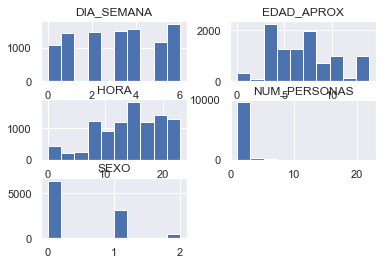

In [384]:
df_accs_lab_sample.drop(['DISTRITO'],1).hist()

plt.show()

In [385]:
df_accs_lab_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


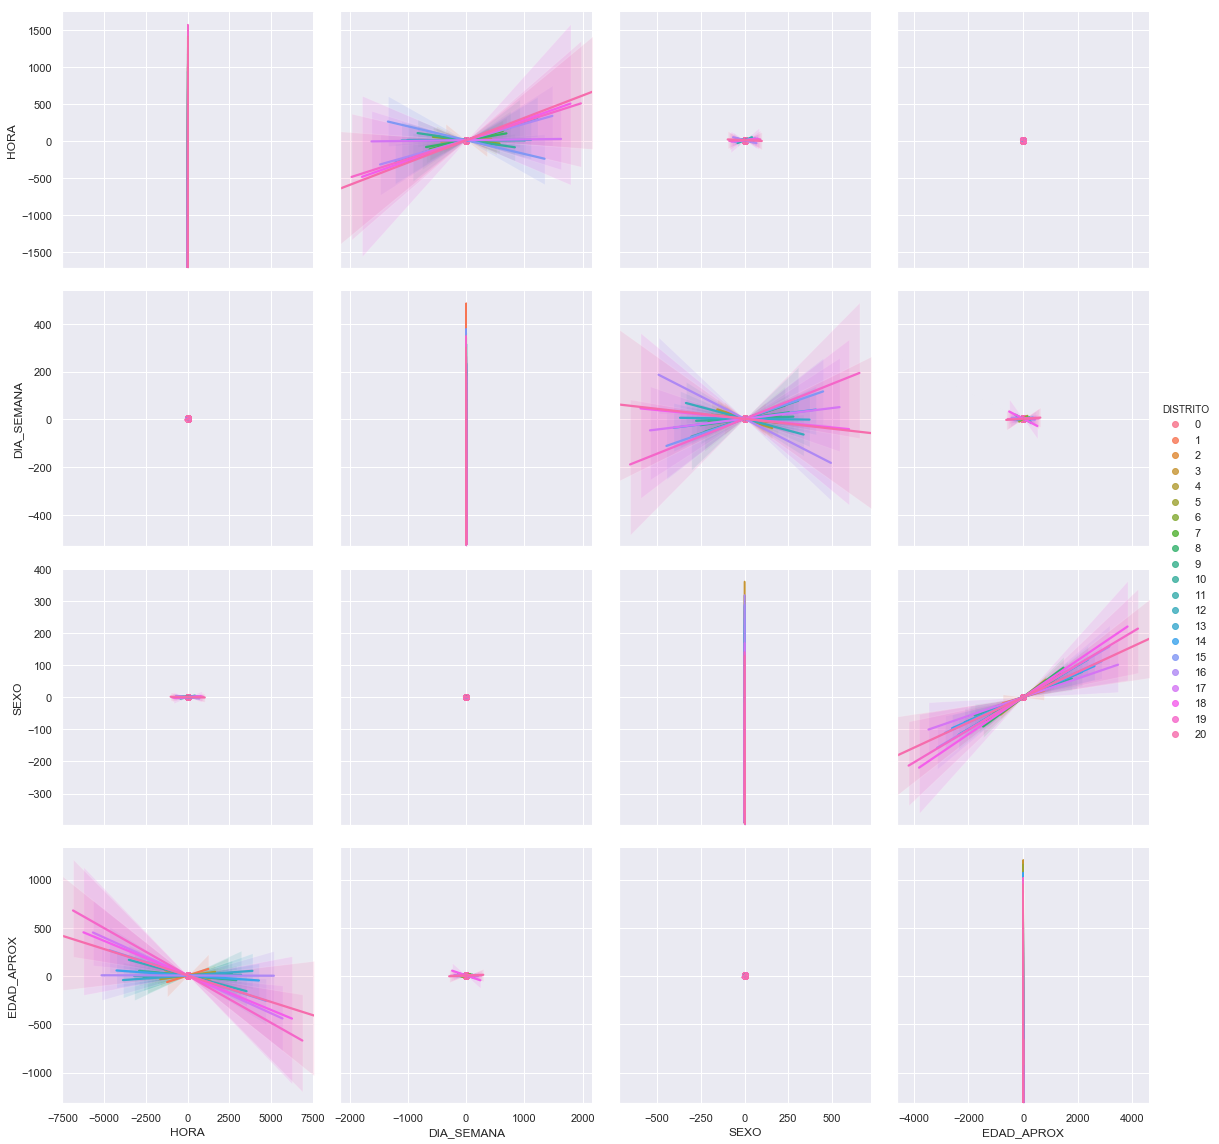

In [386]:
# Y también podemos ver la interrelación mediante el gráfico de pares (matriz de diagrama de dispersión)
# Nos permite ver tanto la distribución de variables individuales como las relaciones entre dos variables.
sb.pairplot(df_accs_lab_sample.dropna(), hue='DISTRITO',height=4,vars=['HORA', 'DIA_SEMANA', \
       'SEXO', 'EDAD_APROX'],kind='reg')

In [387]:
df_accs_lab_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

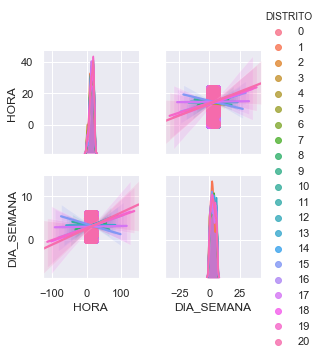

In [388]:
# Y también podemos ver la interrelación mediante el gráfico de pares (matriz de diagrama de dispersión)
# Nos permite ver tanto la distribución de variables individuales como las relaciones entre dos variables.
sb.pairplot(df_accs_lab_sample.dropna(), hue='DISTRITO',height=2,vars=['HORA', 'DIA_SEMANA'],kind='reg')

In [389]:
# Tenemos cargado:
# Cargamos variables con datos de muestra
#X = np.array(df_accs_lab_ohe_sample.drop('DISTRITO', 1))
#y = np.array(df_accs_lab_ohe_sample["DISTRITO"])
#X.shape

In [390]:
# Mirar datos mapeados

In [391]:
df_accs_lab_ohe_sample.groupby(['DISTRITO'], as_index=False).agg(['count'])

,HORA,DIA_SEMANA,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
,count,count,count,count,count,count,count,count,count
DISTRITO,,,,,,,,,
0,520,520,520,520,520,520,520,520,520
1,126,126,126,126,126,126,126,126,126
2,651,651,651,651,651,651,651,651,651
3,675,675,675,675,675,675,675,675,675
4,756,756,756,756,756,756,756,756,756
5,580,580,580,580,580,580,580,580,580
6,582,582,582,582,582,582,582,582,582
7,562,562,562,562,562,562,562,562,562


In [392]:
df_accs_lab_ohe_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,08:00,LUNES,15,1,COLISION_DOBLE,MOTOCICLETA,CONDUCTOR,HOMBRE,HERIDO_LEVE,40


In [393]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [394]:
df_accs_lab_ohe['HORA']= lab.fit_transform(df_accs_lab_ohe['HORA'])
df_accs_lab_ohe['DIA_SEMANA']= lab.fit_transform(df_accs_lab_ohe['DIA_SEMANA'])
#df_accs_lab_ohe['DISTRITO']= lab.fit_transform(df_accs_lab_ohe['DISTRITO'])
df_accs_lab_ohe['SEXO']= lab.fit_transform(df_accs_lab_ohe['SEXO'])
df_accs_lab_ohe['EDAD_APROX']= lab.fit_transform(df_accs_lab_ohe['EDAD_APROX'])

In [395]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,0,6,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,0,INGRESO_LEVE,3


In [396]:
# Cargamos variables con datos de muestra
X = np.array(df_accs_lab_ohe.drop('DISTRITO', 1))
y = np.array(df_accs_lab_ohe["DISTRITO"])
X.shape

(252998, 9)

In [397]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [398]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'COLISION_DOBLE'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_accs_lab_ohe.columns

In [ ]:
df_accs_lab_ohe.head(1)

In [ ]:
df_accs_lab_ohe.shape

In [ ]:
df_accs_lab_ohe.isnull().sum()

In [ ]:
# Create the encoder.
encoder = OneHotEncoder(handle_unknown='ignore')

# Assume for simplicity all features are categorical.
encoder.fit(X_train)

In [ ]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X.shape

In [ ]:
X_train

In [ ]:
X_test

### Regresión Logística con SKLearn

In [ ]:
# Creamos el Modelo de Regresión Logística y 
# hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.
from sklearn.linear_model.sag import sag_solver
model_LOGREG = linear_model.LogisticRegression(multi_class='auto', solver='sag', verbose=0)
model_LOGREG.fit(X_train,y_train)

In [ ]:
# Clasificamos todo nuestro conjunto de entradas X utilizando el método «predict(X)» para el modelo
# y revisamos algunas de sus salidas para comprobar si coincide con las salidas reales de nuestro origen
predictions_LOGREG = model_LOGREG.predict(X_test)

In [ ]:
print(predictions_LOGREG[22])

In [ ]:
type(predictions_LOGREG)

In [ ]:
predictions_LOGREG.dtype

In [ ]:
predictions_LOGREG.shape

In [ ]:
print(accuracy_score(y_test, predictions_LOGREG))

In [ ]:
# Calidad de nuestro modelo, nos devuelve la precisión media de las predicciones
model_LOGREG.score(X_test,y_test)

### AÑADIMOS NUEVAS VARIABLES PARA INTENTAR MEJORAR EL MODELO

In [ ]:
!ls -ltr {folder}/distri*

In [ ]:
import os
os.getcwd()

In [ ]:
!ls -ltr distritos_municipio_madrid.csv

In [ ]:
df_distritos = pd.read_csv("distritos_municipio_madrid.csv", sep=';', encoding='latin-1')

In [ ]:
df_distritos.columns

In [ ]:
df_distritos.head(3)

In [ ]:
drop_elements = ['municipio_codigo', 'municipio_nombre']
df_distritos_lab = df_distritos.drop(drop_elements, axis = 1)

In [ ]:
df_distritos_lab.columns

In [ ]:
df_distritos_lab.head(3)

In [ ]:
df_distritos_lab.dtypes

In [ ]:
df_distritos_lab.shape

In [ ]:
df_accs.columns

In [ ]:
df_distritos_lab = df_distritos_lab.rename(columns = {'distrito_nombre':'DISTRITO'})

In [ ]:
df_distritos_lab.head()

In [ ]:
df_accs.head(3)

In [ ]:
df_accs['DISTRITO'].unique()

In [ ]:
df_distritos_lab['DISTRITO'].unique()

In [ ]:
# strip leading and trailing space only strings
df_distritos_lab['DISTRITO'] = df_distritos_lab['DISTRITO'].str.strip()


In [ ]:
df_distritos_lab['DISTRITO'].unique()

In [ ]:
df_accs['DISTRITO'].unique()

In [ ]:
df_distritos_lab['DISTRITO'] = df_distritos_lab['DISTRITO'].str.upper()

In [ ]:
df_distritos_lab['DISTRITO'].unique()

In [ ]:
df_accs['DISTRITO'].unique()

In [ ]:
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"CHAMARTÍN":"CHAMARTIN"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"CHAMBERÍ":"CHAMBERI"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"VICÁLVARO":"VICALVARO"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"SAN BLAS-CANILLEJAS":"SAN BLAS"}, regex=True)

In [ ]:
df_distritos_lab['DISTRITO'].unique()

In [ ]:
df_distritos_lab.columns

In [ ]:
df_distritos_lab['distrito_codigo'].unique()

In [ ]:
df_distritos_lab['superficie_km2'].unique()

In [ ]:
df_distritos_lab['densidad_por_km2'].unique()

In [ ]:
# Comprobar valores nulos
df_distritos_lab.isnull().sum()

In [ ]:
from functools import reduce
df_accs_join_dist = [df_accs_lab_ohe, df_distritos_lab]
df_accs_join_dist = reduce(lambda left,right: pd.merge(left,right, on=['DISTRITO']), df_accs_join_dist)
df_accs_join_dist

In [ ]:
df_accs_join_dist.shape

In [ ]:
df_accs_join_dist.columns

In [ ]:
df_accs_join_dist = df_accs_join_dist.rename(columns = {'distrito_codigo':'COD_DISTRITO'})
df_accs_join_dist = df_accs_join_dist.rename(columns = {'superficie_km2':'SUP_KM2'})
df_accs_join_dist = df_accs_join_dist.rename(columns = {'densidad_por_km2':'DENSIDAD_KM2'})

In [ ]:
df_accs_join_dist.columns

In [ ]:
df_accs_join_dist["COD_DISTRITO"].unique()

In [ ]:
df_accs_join_dist["SUP_KM2"].unique()

In [ ]:
df_accs_join_dist["DENSIDAD_KM2"].unique()

In [ ]:
df_accs_join_dist.columns

In [ ]:
df_inf_xa_dis = df_accs_join_dist.reset_index(drop=True).copy()

In [ ]:
df_inf_xa_dis.dtypes

In [ ]:
# Convertir a object las columnas numéricas
df_inf_xa_dis["COD_DISTRITO"]=df_inf_xa_dis['COD_DISTRITO'].astype(np.str)
df_inf_xa_dis["SUP_KM2"]=df_inf_xa_dis['SUP_KM2'].astype(np.str)
df_inf_xa_dis["DENSIDAD_KM2"]=df_inf_xa_dis['DENSIDAD_KM2'].astype(np.str)

In [ ]:
df_inf_xa_dis.dtypes

In [ ]:
df_inf_xa_dis.columns

In [ ]:
# Cargamos variables.
X = np.array(df_inf_xa_dis.drop(['DISTRITO'],1))
y = np.array(df_inf_xa_dis['DISTRITO'])
X.shape


# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
# Assume for simplicity all features are categorical.
encoder.fit(X_train)    

# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)



In [ ]:
X.shape

In [ ]:
X[0]

In [ ]:
X_train

In [ ]:
X_test

### Regresión Logística con SKLearn (2)

In [ ]:
# Creamos el Modelo de Regresión Logística y 
# hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.
from sklearn.linear_model.sag import sag_solver
model_LOGREG = linear_model.LogisticRegression(multi_class='auto', solver='sag')
model_LOGREG.fit(X_train,y_train)

In [ ]:
# Clasificamos todo nuestro conjunto de entradas X utilizando el método «predict(X)» para el modelo
# y revisamos algunas de sus salidas para comprobar si coincide con las salidas reales de nuestro origen
predictions_LOGREG = model_LOGREG.predict(X_test)

In [ ]:
print(predictions_LOGREG[22])

In [ ]:
type(predictions_LOGREG)

In [ ]:
predictions_LOGREG.dtype

In [ ]:
predictions_LOGREG.shape

In [ ]:
print(accuracy_score(y_test, predictions_LOGREG))

In [ ]:
# Calidad de nuestro modelo, nos devuelve la precisión media de las predicciones
model_LOGREG.score(X_test,y_test)

In [ ]:
y_test.dtype

In [ ]:
len(y_test)

In [ ]:
y_test.shape

In [ ]:
y_test[22,]

########################################################

##########################################

############################

## VALIDAR MODELO

In [ ]:
df_inf_xa_dis.columns

In [ ]:
df_inf_xa_dis.dtypes

In [ ]:
df_inf_xa_dis.head(1)

In [ ]:
# Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% 
# de los datos de entrada y calculamos el nuevo scoring
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model_LOGREG, X_train, y_train, cv=kfold, \
                                             scoring='accuracy', error_score=np.nan, verbose=0)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
# Y ahora hacemos las predicciones (en realidad clasificación) utilizando nuestro «cross validation set»
# es decir del subconjunto que habíamos apartado. 
# Aciertos: xxx %
predictions_LOGREG = model_LOGREG.predict(X_test)
print(accuracy_score(y_test, predictions_LOGREG))

# Resultados del modelo

In [ ]:
## Matrix de confusión para los errores
print(confusion_matrix(y_test, predictions_LOGREG))

In [ ]:
## Informe de clasificación con nuestro conjunto de TEST
# Observamos el promedio de F1-score
print(classification_report(y_test, predictions_LOGREG))

# Clasificación (o predicción) de nuevos valores

In [ ]:
df_inf_xa_dis.columns

In [ ]:
df_inf_xa_dis.head(1)

In [ ]:
df_accs.head(1)

In [ ]:
model_LOGREG.predict_log_proba(X_test)

In [ ]:
model_LOGREG.coef_

In [ ]:
model_LOGREG.score

In [ ]:
df_inf_xa_dis.dtypes

In [ ]:
predictions_LOGREG[22]

In [ ]:
y_test[22]